# Impurity Project

Whilst the yield of pharmaceutical/agrochemical-related intermediates and active ingredients in a reaction optimisation is often the main objective targeted, the presence of impurities at any stage of the multi-step reaction processes may affect the quality, safety, and efficacy of the final product.Therefore, an investigation into the side-products and/or degradation-related impurities of the reactions should be undertaken before conducting an automated optimisation. 

Existing forward reaction predictors such as ASKCOS and IBM RXN, whilst suitable for predicting main products, can fail for ring forming reactions, and sometimes don't suggest correct impurities. High-Throughput Screening (HTS) will yield the most accurate data, but can be time consuming. A tool that could predict impurities accurately, quickly and robustly can aid early-stage synthesis planning, route selection as well as automated optimisation. 

To this end, ongoing work is being undertaken in Cambridge CARES as part of PIPS. The main aim is to predict the impurities generated from an input chemical reaction given **reactants, reagents, reaction conditions and the main product(s)** (although this is not mandatory). 

Large chemical databases such as Reaxys contain millions of reactions (49 million as of 2019) spanning different types of chemistry, which can offer interesting insights into how functional groups can interact with each other. The methodology followed in this project relies on mining Reaxys for similar reactions (candidate reactions) to the input reaction, extracting templates from these candidate reactions encoding all possible transformations, and applying these templates to the input reaction to generate a list of possible impurities. The workflow is shown below in greater detail.


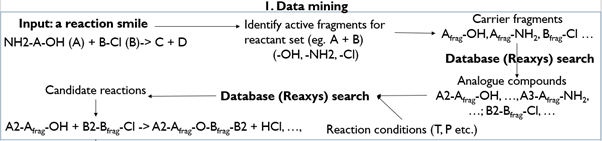

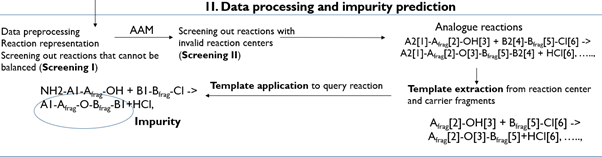





In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem #Overall support
from rdkit.Chem import FunctionalGroups
from rdkit.Chem import PeriodicTable, GetPeriodicTable
import cirpy
from rdkit.Chem import RDConfig
from rdkit.Chem import Draw #For drawing molecules/reactions
from rdkit.Chem import rdChemReactions #Reaction processing
from rdkit.Chem.Draw import rdMolDraw2D #Drawing 2D molecules/reactions
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display, Image
from IPython.display import SVG  #For SVG support
from PIL import Image #Working with images
import matplotlib.pyplot as plt
import io
import os #Working with the OS
from rxnmapper import RXNMapper #Importing RXNMapper for unsupervised atom mapping
from ttictoc import tic,toc
from rdkit.Chem import BRICS #For fragmenting
from chempy import balance_stoichiometry
import json
try:
    import pickle5 as pickle #Only if pickle doesn't work
except Exception:
    import pickle
import cairosvg
import copy, itertools,shutil
from collections import Counter
from helpCompound import hc_smilesDict, hc_molDict
from FindFunctionalGroups import identify_functional_groups as IFG

In [8]:
%who

?balance_stoichiometry

AllChem	 BRICS	 Chem	 Counter	 Draw	 FunctionalGroups	 GetPeriodicTable	 IFG	 IPythonConsole	 
Image	 PeriodicTable	 RDConfig	 RXNMapper	 SVG	 balance_stoichiometry	 cairosvg	 cirpy	 copy	 
display	 hc_molDict	 hc_smilesDict	 io	 itertools	 json	 os	 pickle	 plt	 
rdChemReactions	 rdMolDraw2D	 shutil	 tic	 toc	 
